# Sales analysis:

### Libraries: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv(r'Amazon Sale Report.csv')

In [3]:
df = df.drop('index',axis='columns')

In [4]:
df['Date'] = pd.to_datetime(df['Date'],format = '%m-%d-%y')
df['day']=df['Date'].dt.day

### EDA:

In [5]:
df.shape

(128975, 24)

In [6]:
df.size

3095400

In [7]:
df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
day                       0
dtype: int64

In [8]:
df = df.drop(columns={'promotion-ids','fulfilled-by','Unnamed: 22'})

In [9]:
df = df.dropna()

In [10]:
df.dtypes

Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Style                         object
SKU                           object
Category                      object
Size                          object
ASIN                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
B2B                             bool
day                            int64
dtype: object

#### Categorical variables:

In [11]:
categorical = df.select_dtypes(include = 'object')

In [12]:
categorical.isnull().sum()

Order ID              0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
currency              0
ship-city             0
ship-state            0
ship-country          0
dtype: int64

In [13]:
categorical.shape

(116016, 15)

In [14]:
for column in categorical:
    print (' - ' + column, ':',categorical[column].nunique())

 - Order ID : 108271
 - Status : 12
 - Fulfilment : 2
 - Sales Channel  : 1
 - ship-service-level : 2
 - Style : 1371
 - SKU : 7132
 - Category : 9
 - Size : 11
 - ASIN : 7128
 - Courier Status : 2
 - currency : 1
 - ship-city : 8499
 - ship-state : 67
 - ship-country : 1


In [15]:
for column in categorical:
    print (' - ' + column, ':',categorical[column].unique())

 - Order ID : ['171-9198151-1101146' '404-0687676-7273146' '407-1069790-7240320' ...
 '407-9547469-3152358' '402-6184140-0545956' '408-7436540-8728312']
 - Status : ['Shipped - Delivered to Buyer' 'Shipped' 'Cancelled'
 'Shipped - Returned to Seller' 'Shipped - Rejected by Buyer'
 'Shipped - Lost in Transit' 'Shipped - Out for Delivery'
 'Shipped - Returning to Seller' 'Shipped - Picked Up' 'Pending'
 'Pending - Waiting for Pick Up' 'Shipped - Damaged']
 - Fulfilment : ['Merchant' 'Amazon']
 - Sales Channel  : ['Amazon.in']
 - ship-service-level : ['Standard' 'Expedited']
 - Style : ['JNE3781' 'JNE3371' 'JNE3671' ... 'J0286' 'J0053' 'SET045']
 - SKU : ['JNE3781-KR-XXXL' 'JNE3371-KR-XL' 'JNE3671-TU-XXXL' ... 'JNE3678-TU-XXL'
 'J0053-KR-XS' 'SET045-KR-NP-M']
 - Category : ['kurta' 'Top' 'Set' 'Western Dress' 'Ethnic Dress' 'Bottom' 'Saree'
 'Blouse' 'Dupatta']
 - Size : ['3XL' 'XL' 'L' 'S' 'XXL' 'XS' '6XL' 'M' '4XL' '5XL' 'Free']
 - ASIN : ['B09K3WFS32' 'B07WV4JV4D' 'B098714BZP' ... 'B09

In [16]:
categorical.head()

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country
1,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,INR,BENGALURU,KARNATAKA,IN
2,404-0687676-7273146,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,INR,NAVI MUMBAI,MAHARASHTRA,IN
4,407-1069790-7240320,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,INR,CHENNAI,TAMIL NADU,IN
5,404-1490984-4578765,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,B08YN7XDSG,Shipped,INR,GHAZIABAD,UTTAR PRADESH,IN
6,408-5748499-6859555,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,L,B08CMHNWBN,Shipped,INR,CHANDIGARH,CHANDIGARH,IN


In [17]:
status = df['Status'].value_counts()
status = status.reset_index()

In [18]:
status = status.rename({'index':'Status','Status':'count'},axis = 'columns')

In [19]:
total = status['count'].sum()

In [20]:
status['Frec.rel'] = status['count'].div(total).round(2)

<function matplotlib.pyplot.show(close=None, block=None)>

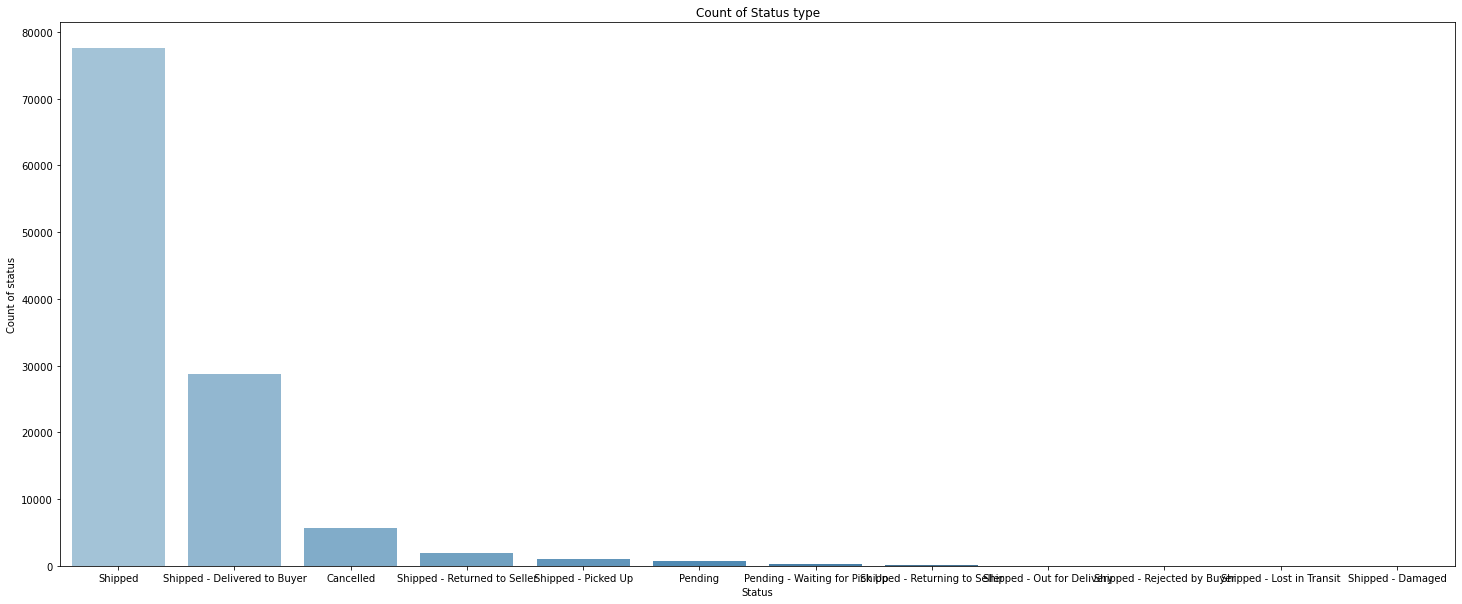

In [21]:
plt.figure(figsize = (25,10))
sns.barplot(x='Status',y = 'count',data = status,palette = 'Blues_d')
plt.title("Count of Status type")
plt.xlabel("Status")
plt.ylabel("Count of status")
plt.show

#### Numerical variables:

In [22]:
numeric = df.select_dtypes(include = ['float','int'])

In [23]:
numeric = numeric.drop(['day','ship-postal-code'],axis = 'columns')

In [24]:
numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
Qty,116016.0,1.003775,0.072651,1.0,1.0,1.0,1.0,8.0
Amount,116016.0,649.780849,282.648892,0.0,449.0,606.0,788.0,5584.0


<AxesSubplot:xlabel='Qty', ylabel='Amount'>

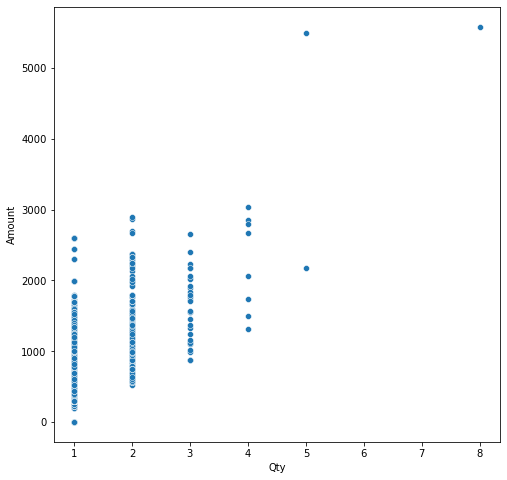

In [25]:
plt.figure(figsize = (8,8))
sns.scatterplot(x= 'Qty',
                y = 'Amount',
                data = numeric)

<AxesSubplot:xlabel='Amount'>

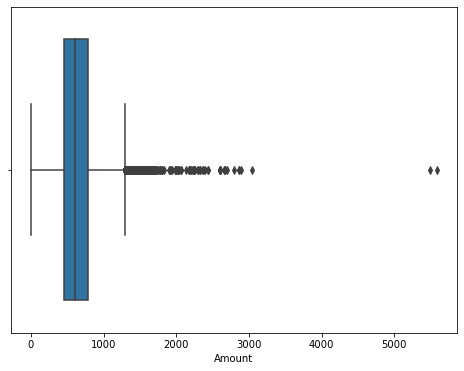

In [26]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'Amount',
           data = numeric)

### Linear regression analysis

In [27]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Users\luisf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\luisf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [28]:
from matplotlib import style
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [29]:
# ==============================================================================
X = numeric[['Qty']]
y = numeric['Amount']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [30]:
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [86.65917519]
Coeficiente: [('Qty', 560.5938423040179)]
Coeficiente de determinación R^2: 0.02124673488517914


In [31]:
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[647.2530175]
 [647.2530175]
 [647.2530175]]

El error (rmse) de test es: 283.05346265684324


In [32]:
print("Coeficiente de determinación R^2 en test es:", modelo.score(X_test, y_test))

Coeficiente de determinación R^2 en test es: 0.016448061216234766


In [33]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2133.
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        22:43:29   Log-Likelihood:            -6.5426e+05
No. Observations:               92812   AIC:                         1.309e+06
Df Residuals:                   92810   BIC:                         1.309e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.6592     12.219      7.092      0.0

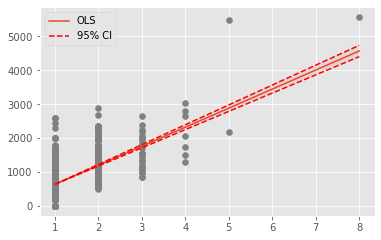

In [34]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();